In [22]:
import os, sys
import numpy as np
import pandas as pd

from config_local import local_config

In [23]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [24]:
train = pd.read_csv(local_config.TRAIN_PROCESS6_CSV)
test  = pd.read_csv(local_config.TEST_PROCESS6_CSV)
testRaw = pd.read_csv(local_config.TEST_CSV, index_col="Id")

In [25]:
y = train['logSP']
X = train.drop(['logSP'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [26]:
alphas = sorted([0.01, 0.1, 30] + [i for i in range(1, 30)])

best_alpha = None
best_rmse = float("inf")

for a in alphas:
    model = Ridge(alpha=a)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # back to original scale (since y is log-transformed)
    y_pred_real = np.exp(y_pred)
    y_test_real = np.exp(y_test)

    mse = mean_squared_error(y_test_real, y_pred_real)
    rmse = mse ** 0.5

    print(f"alpha={a} -> RMSE={rmse:.2f}")

    if rmse < best_rmse:
        best_rmse = rmse
        best_alpha = a
print(f"Best alpha: {best_alpha} with RMSE={best_rmse:.2f}")

model = Ridge(alpha=best_alpha)
model.fit(X_train, y_train)

test_pred = model.predict(test)  
test_pred_real = np.exp(test_pred)


alpha=0.01 -> RMSE=21649.98
alpha=0.1 -> RMSE=21467.37
alpha=1 -> RMSE=20627.90
alpha=2 -> RMSE=20306.08
alpha=3 -> RMSE=20147.87
alpha=4 -> RMSE=20054.84
alpha=5 -> RMSE=19994.62
alpha=6 -> RMSE=19953.38
alpha=7 -> RMSE=19924.25
alpha=8 -> RMSE=19903.37
alpha=9 -> RMSE=19888.41
alpha=10 -> RMSE=19877.85
alpha=11 -> RMSE=19870.69
alpha=12 -> RMSE=19866.20
alpha=13 -> RMSE=19863.83
alpha=14 -> RMSE=19863.20
alpha=15 -> RMSE=19864.00
alpha=16 -> RMSE=19865.98
alpha=17 -> RMSE=19868.96
alpha=18 -> RMSE=19872.78
alpha=19 -> RMSE=19877.31
alpha=20 -> RMSE=19882.45
alpha=21 -> RMSE=19888.12
alpha=22 -> RMSE=19894.23
alpha=23 -> RMSE=19900.73
alpha=24 -> RMSE=19907.56
alpha=25 -> RMSE=19914.68
alpha=26 -> RMSE=19922.04
alpha=27 -> RMSE=19929.63
alpha=28 -> RMSE=19937.39
alpha=29 -> RMSE=19945.32
alpha=30 -> RMSE=19953.39
Best alpha: 14 with RMSE=19863.20


In [27]:
submission = pd.DataFrame({
    "Id": testRaw.index,
    "SalePrice": test_pred_real
})

out_path = os.path.join(local_config.SUBMISSIONS_DIR, "ridgeModel.csv")
submission.to_csv(out_path, index=False)

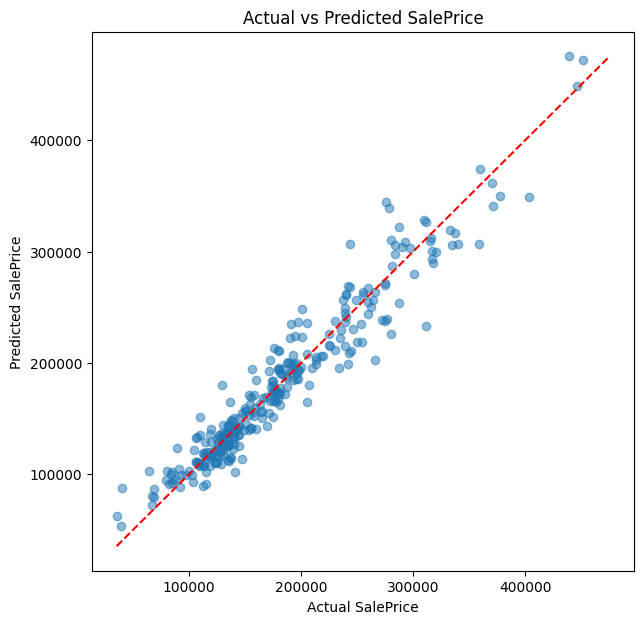

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# If you used log1p:
y_true = np.expm1(y_test)
y_pred = np.expm1(y_pred)

plt.figure(figsize=(7,7))
plt.scatter(y_true, y_pred, alpha=0.5)

# perfect prediction line
line_min = min(y_true.min(), y_pred.min())
line_max = max(y_true.max(), y_pred.max())
plt.plot([line_min, line_max], [line_min, line_max], 'r--')

plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted SalePrice")

plt.show()